In [1]:
# General Data Processing and Visualization Tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.metrics import classification_report, precision_recall_fscore_support

In [2]:
# Specific Models for Testing
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier

In [3]:
# Visualization Tools
from yellowbrick.classifier import ClassificationReport
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

def make_vis(model_clf,train,val):
  viz = ClassificationReport(model_clf, classes=['0', '1'], support = True)
  viz.fit(train, np.ravel(label_train))
  viz.score(val, np.ravel(label_val))
  viz.poof()

def make_cmatrix(predictions,clf_name):
  cm = confusion_matrix(label_val, predictions)
  cm_display = ConfusionMatrixDisplay(cm,display_labels=['Normal','Fraud'])
  cm_display.plot(values_format='d')
  plt.title("Confusion Matrix: "+clf_name)
  plt.grid(False)
  plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
data_raw = pd.read_csv('../data/creditcard.csv', sep=",")

In [5]:
data_only = data_raw.drop(["Class"],axis=1)
labels_only = data_raw.take([-1],axis=1)

In [6]:
from sklearn.model_selection import train_test_split
train_raw, val_raw, label_train, label_val = train_test_split(data_only, labels_only,\
                                                                stratify=labels_only,\
                                                                test_size = 0.2,\
                                                               random_state = 255)

## LinReg

In [7]:
linear_regresser_0 = LogisticRegression(solver="lbfgs", max_iter=500, random_state=255).fit(train_raw,np.ravel(label_train))

prediction_lr = linear_regresser_0.predict(val_raw)
print(classification_report(np.ravel(label_val), prediction_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.69      0.76        98

    accuracy                           1.00     56962
   macro avg       0.92      0.85      0.88     56962
weighted avg       1.00      1.00      1.00     56962



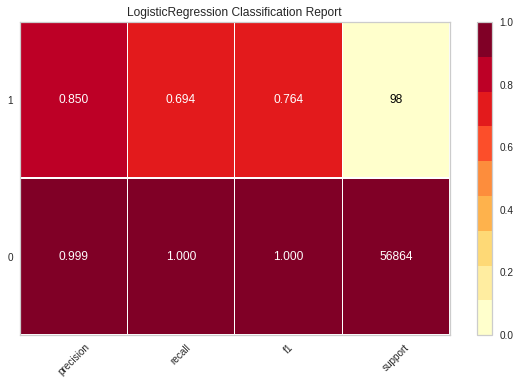

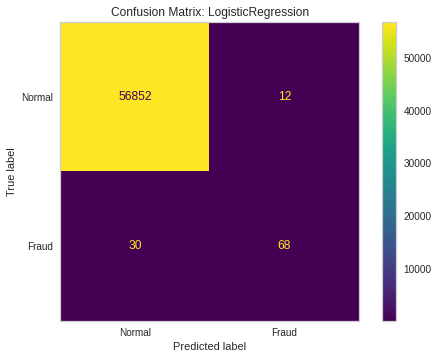

In [8]:
make_vis(linear_regresser_0,train_raw,val_raw)
make_cmatrix(prediction_lr,"LogisticRegression")

## SVC

In [9]:
svc_clf = LinearSVC(random_state=255).fit(train_raw,np.ravel(label_train))

prediction_svc = svc_clf.predict(val_raw)
print(classification_report(np.ravel(label_val), prediction_svc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.67      0.02      0.04        98

    accuracy                           1.00     56962
   macro avg       0.83      0.51      0.52     56962
weighted avg       1.00      1.00      1.00     56962



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


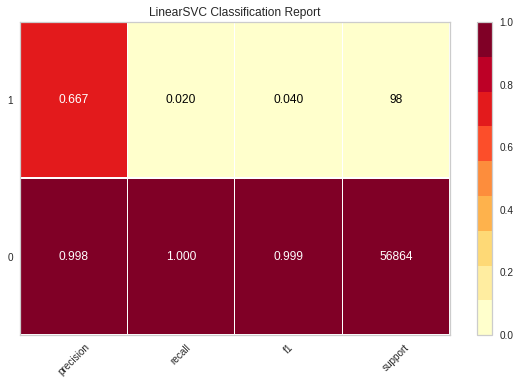

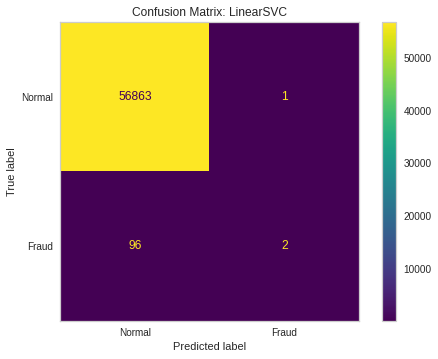

In [10]:
make_vis(svc_clf,train_raw,val_raw)
make_cmatrix(prediction_svc,"LinearSVC")

## MLP

In [11]:
mlp_clf = MLPClassifier(solver='adam', activation='relu',
                            hidden_layer_sizes=(train_raw.shape[1],16,2), random_state = 255,
                            max_iter=500).fit(train_raw,np.ravel(label_train))

prediction_mlp = mlp_clf.predict(val_raw)
print(classification_report(np.ravel(label_val), prediction_mlp))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


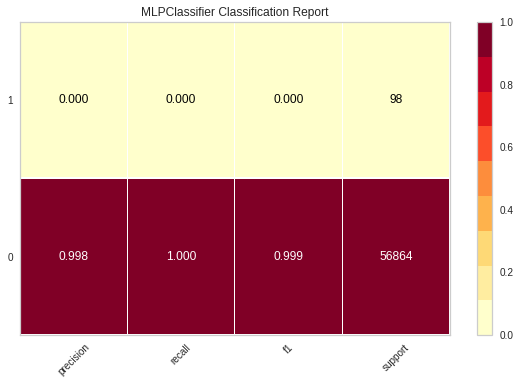

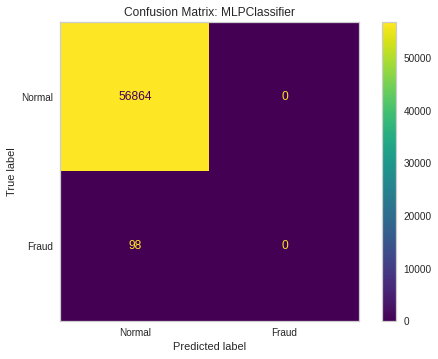

In [12]:
make_vis(mlp_clf,train_raw,val_raw)
make_cmatrix(prediction_mlp,"MLPClassifier")

## Check how preprocessing effects results

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_raw)
scaled_train = scaler.transform(train_raw)
scaled_val = scaler.transform(val_raw)

from sklearn.preprocessing import MinMaxScaler
minmaxScaler = MinMaxScaler()
minmax_train = minmaxScaler.fit_transform(train_raw)
minmax_val = minmaxScaler.transform(val_raw)

### Linreg Scaled

In [14]:
linear_regresser_s = LogisticRegression(solver="lbfgs", max_iter=500, random_state=255).fit(scaled_train,np.ravel(label_train))

prediction_lr_s = linear_regresser_s.predict(scaled_val)
print(classification_report(np.ravel(label_val), prediction_lr_s))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.89      0.65      0.75        98

    accuracy                           1.00     56962
   macro avg       0.94      0.83      0.88     56962
weighted avg       1.00      1.00      1.00     56962



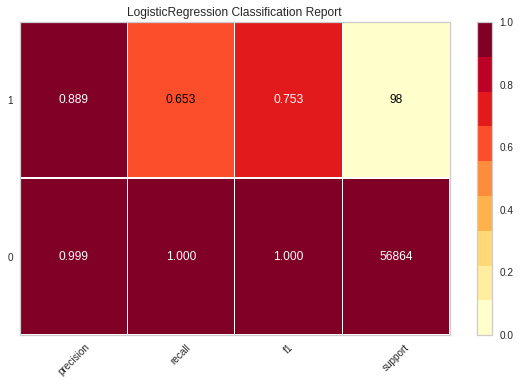

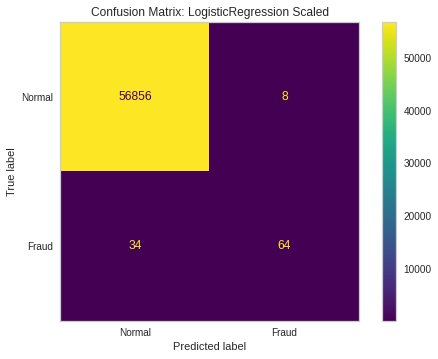

In [15]:
make_vis(linear_regresser_s,scaled_train,scaled_val)
make_cmatrix(prediction_lr_s,"LogisticRegression Scaled")

In [16]:
linear_regresser_mm = LogisticRegression(solver="lbfgs", max_iter=500, random_state=255).fit(minmax_train,np.ravel(label_train))

prediction_lr_mm = linear_regresser_mm.predict(minmax_val)
print(classification_report(np.ravel(label_val), prediction_lr_mm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.51      0.64        98

    accuracy                           1.00     56962
   macro avg       0.93      0.76      0.82     56962
weighted avg       1.00      1.00      1.00     56962



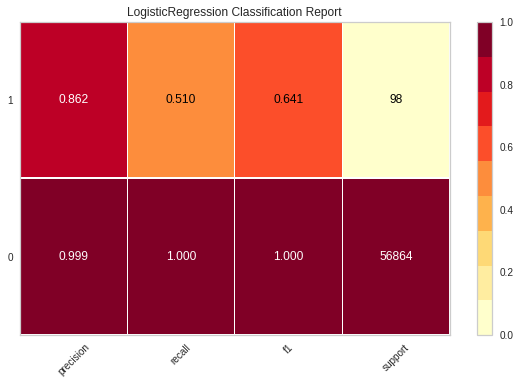

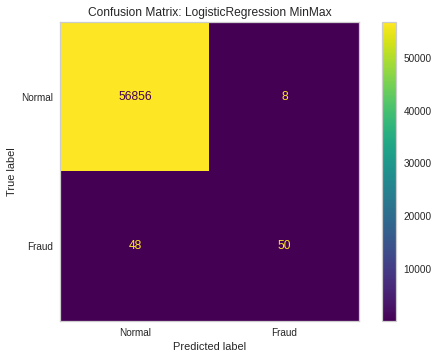

In [17]:
make_vis(linear_regresser_mm,minmax_train,minmax_val)
make_cmatrix(prediction_lr_mm,"LogisticRegression MinMax")

### SVC Scaled

In [18]:
svc_clf_s = LinearSVC(random_state=255).fit(train_raw,np.ravel(label_train))

prediction_svc_s = svc_clf_s.predict(scaled_val)
print(classification_report(np.ravel(label_val), prediction_svc_s))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98     56864
           1       0.01      0.36      0.02        98

    accuracy                           0.95     56962
   macro avg       0.51      0.66      0.50     56962
weighted avg       1.00      0.95      0.97     56962



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


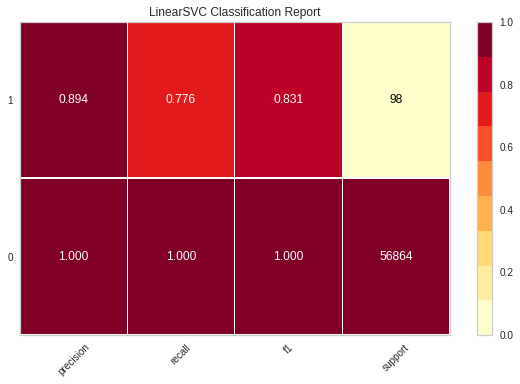

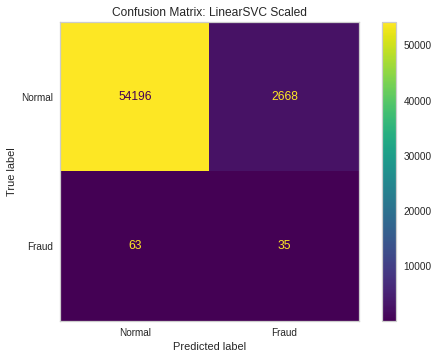

In [19]:
make_vis(svc_clf_s,scaled_train,scaled_val)
make_cmatrix(prediction_svc_s,"LinearSVC Scaled")

In [20]:
svc_clf_mm = LinearSVC(random_state=255).fit(minmax_train,np.ravel(label_train))

prediction_svc_mm = svc_clf_mm.predict(minmax_val)
print(classification_report(np.ravel(label_val), prediction_svc_mm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.55      0.67        98

    accuracy                           1.00     56962
   macro avg       0.94      0.78      0.84     56962
weighted avg       1.00      1.00      1.00     56962



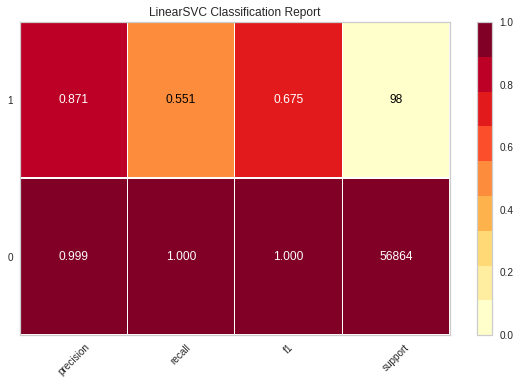

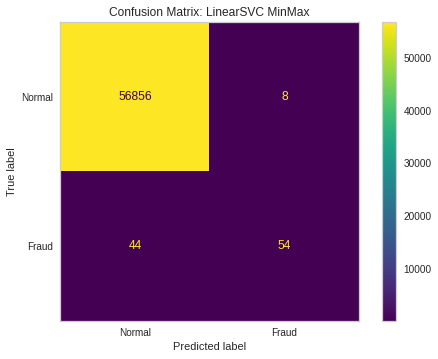

In [21]:
make_vis(svc_clf_mm,minmax_train,minmax_val)
make_cmatrix(prediction_svc_mm,"LinearSVC MinMax")

### MLP Scaled

In [22]:
mlp_clf_s = MLPClassifier(solver='adam', activation='relu',
                            hidden_layer_sizes=(scaled_train.shape[1],16,2), random_state = 255,
                            max_iter=500).fit(scaled_train,np.ravel(label_train))

prediction_mlp_s = mlp_clf_s.predict(scaled_val)
print(classification_report(np.ravel(label_val), prediction_mlp_s))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.76      0.84      0.80        98

    accuracy                           1.00     56962
   macro avg       0.88      0.92      0.90     56962
weighted avg       1.00      1.00      1.00     56962



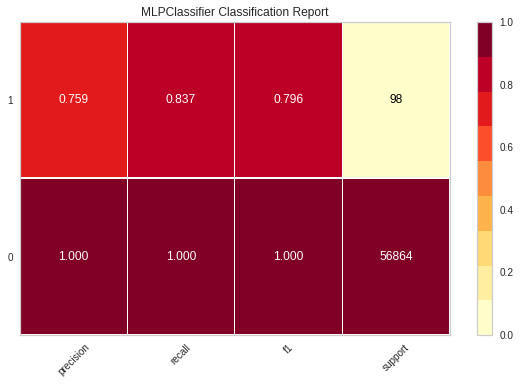

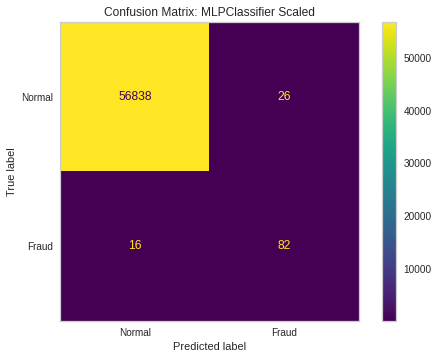

In [23]:
make_vis(mlp_clf_s,scaled_train,scaled_val)
make_cmatrix(prediction_mlp_s,"MLPClassifier Scaled")

In [24]:
mlp_clf_mm = MLPClassifier(solver='adam', activation='relu',
                            hidden_layer_sizes=(minmax_train.shape[1],16,2), random_state = 255,
                            max_iter=500).fit(minmax_train,np.ravel(label_train))

prediction_mlp_mm = mlp_clf_mm.predict(minmax_val)
print(classification_report(np.ravel(label_val), prediction_mlp_mm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.89      0.82      0.85        98

    accuracy                           1.00     56962
   macro avg       0.94      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962



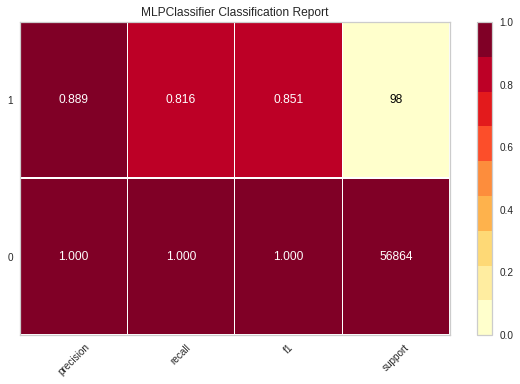

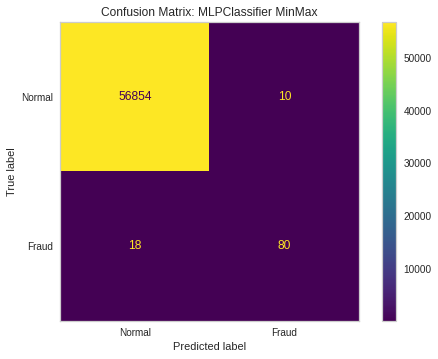

In [25]:
make_vis(mlp_clf,minmax_train,minmax_val)
make_cmatrix(prediction_mlp_mm,"MLPClassifier MinMax")

# Results

Best Results from Perceptron after Scaling, the method of scaling did not appear to make a major difference